In [1]:
import pytesseract
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
imgs = [cv2.cvtColor(cv2.imread('/home/ad/test/src'+str(i+1)+".jpg",0), cv2.COLOR_BGR2RGB) for i in range(5)]


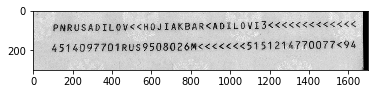

In [3]:
plt.imshow(imgs[0])

In [4]:
def show(img):
    plt.figure(figsize=(30,30)) 
    plt.imshow(img,cmap='gray')
    plt.show()
    
def getTextAreas(img):
    blur = cv2.GaussianBlur(img,(59,29),0)
    ret,th1 = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
    th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2GRAY)
    fc, h = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(fc[0])
    crop = img[y:y+h,x:x+w].copy()
    h,w = crop.shape[:2]

    k3 = np.ones((3,1),np.uint8)
    k5 = np.ones((9,9),np.uint8)
    blur = cv2.GaussianBlur(crop,((crop.shape[1]-1)//2*2+1,1),0)
    blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,159,2)
    cv2.rectangle(th3, (0, 0), (w, h), (255,255,255), 40)
    opn = cv2.morphologyEx(th3, cv2.MORPH_OPEN, k5,iterations=1)
    contours, hierarchy = cv2.findContours(opn, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for i in contours:
        x, y, w, h = cv2.boundingRect(i)
        if h<120 and h>30:
            regions.append(crop[y-int(h*.2):y+h+int(h*.2),x:x+w].copy())
    return regions
def moving_avg(a, n):
    delta = n//2
    al = [int(sum(a[:delta])/delta)]*delta
    ar = [int(sum(a[-delta:])/delta)]*delta
    a_ext = al+a+ar
    a_moving = []
    for i in range(len(a)):
        sub_a = a_ext[i:i+n]
        a_moving.append(sum(sub_a)//n)
    return a_moving


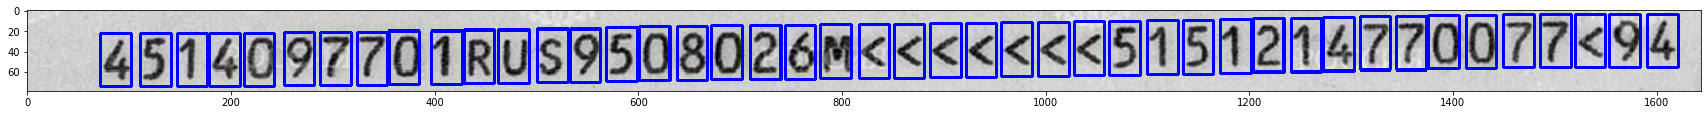

4514097701RUS9508026M<<<<<<<5151214770077<94


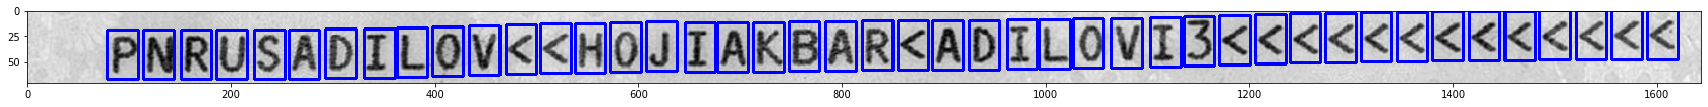

PNRUSADILOV<<HOJ TAKBAR<ADILOVI3<<<<<<<eeesc<


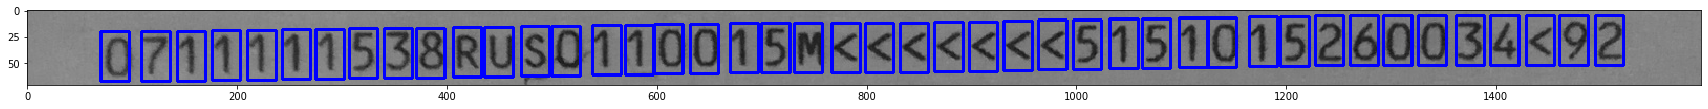

0711111538RUSO110015M<<<<<<<51 51015260034<92


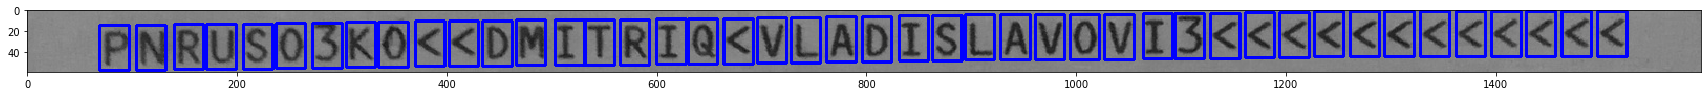

PNRUSO3KO<<DMITRIQ<VLADISLAVOVI3<<<<<< <<< <<<


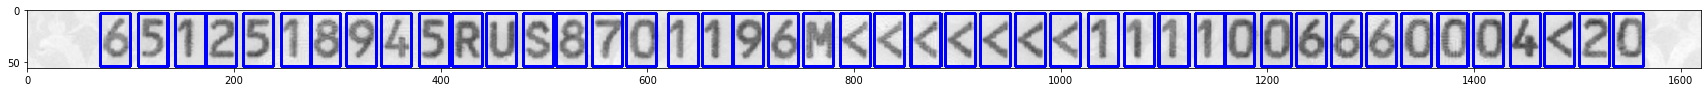

6512518945RUS8701196M<<<<<<<1111006660004<20


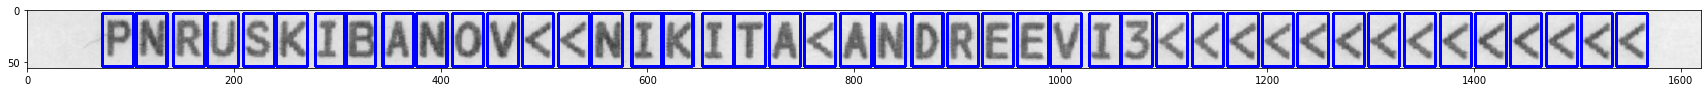

PNRUSKIBANOV<<NIKITA<ANDREEVI3<<<<<<<<<<K << <<


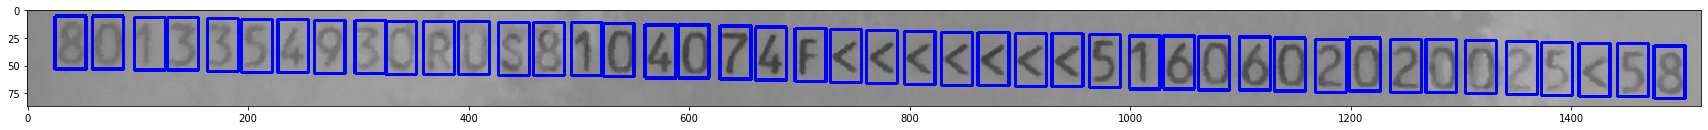

8013354930 PUSBEIO4O74F<<<<<<<51606020200°°<58


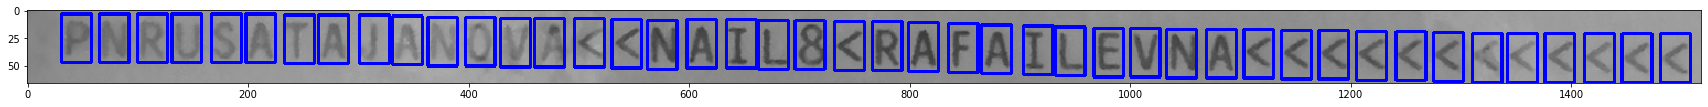

PNRUSATAJANOVAK<NAILE<RAFAILEVNA<<<¢<eeKc cece:


In [6]:
cuts = []
N=8 #для скользящего среднего
k7 = np.ones((21,5),np.uint8)
for i in range(4):
    img = imgs[i].copy()
    areas = getTextAreas(img)
    for r in areas:
        cuts.append(r)
for img in cuts:
    text = pytesseract.image_to_string(img, config="-c tessedit_char_blacklist=\"e¢\" -psm 6 --oem 3")
#     show(img)
    h,w = img.shape[:2]
    blur = cv2.GaussianBlur(img,(15,27),0)
    blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,29,5)
    opn = cv2.morphologyEx(th3, cv2.MORPH_OPEN, k7,iterations=1)
    cv2.rectangle(opn, (0, 0), (w, h), (255,255,255), 10)
    contours, hierarchy = cv2.findContours(opn, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bb = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>260 and area<10000:
            x, y, w, h = cv2.boundingRect(cnt)
            cx = x+w//2
            cy = y+h//2
            bb.append((x,y,w,h,cx,cy))


    bb.sort(key=lambda tup: tup[0]) 
    x,y,w,h,cx,cy = zip(*bb)
    mcy = moving_avg(list(cy),8)
    hm = int(np.mean(h).item())
    wm = int(np.mean(w).item())
    yn = [int(i-hm//2) for i in mcy]
    counter = 0
    for x,y in zip(x,yn):
        counter+=1
        cv2.rectangle(img, (x-2, y-2), (x+wm+2, y+hm+2), (0,0,255), 2)

    show(img)
    print(text)